In [1]:
#sys.path.insert(0,"./py_files")
import os
import numpy as np
from collections import defaultdict
import performance_measures
import pd_LSR

In [2]:
# A dictionary giving the values of Mean and SD in a list for each encountered phoneme.
stat_dict = pd_LSR.phone_stats(pd_LSR.read_trainig_files())

In [3]:
# Returns a list of phonemes occuring in the test files, followed by their respective durations
# Looks like: ["a", 583, 0.5, "b", 12, 0.78, "a", 489, 0.12, ...]
testlist = pd_LSR.read_testfiles()

In [4]:
# List of predicted durations for the testfiles, 
#   to be used for calculating errors, correlation, etc. with actual durations
predictions = pd_LSR.create_prediction_list(testlist, stat_dict)
# List of actual durations occuring in the testfiles, 
#   to be used for calculating errors, correlation, etc. with predicted durations
actual = testlist[1::3]

In [5]:
# Calculate RMSE, MAE, and pearson correlation coefficient (predictions vs. actual)
global_rmse, mae = performance_measures.calc_error_for_data(predictions, actual)
corrCoef = performance_measures.corrCoef(predictions, actual)[0]

print("Overall RMSE: " + str(global_rmse) + 
      "\nOverall MAE: " + str(mae) +
      "\nOverall Pearson CorrCoef: " + str(corrCoef))

Overall RMSE: 649.661118359
Overall MAE: 274.025377522
Overall Pearson CorrCoef: 0.30817759062


In [6]:
########## Procedures for calculating errors per phoneme ##########
# Set of occuring phonemes to iterate on when creating dictionary
#set_phon = set(prepare_data.read_testfiles()[::2])
set_phon = set(pd_LSR.read_testfiles()[::3])
#print(set_phon)

# A list of phonemes in occuring order in the actual and pred lists
#a_phone_list = prepare_data.read_testfiles()[::2]
a_phone_list = pd_LSR.read_testfiles()[::3]
#print(a_phone_list)

# Use list comprehension to interweave the phoneme list with the list of predicted durations
#   so we can create the dictionary of predictions per phoneme
pred_list = [x for y in zip (a_phone_list, predictions) for x in y]
# Dictionary of actual values per phoneme
a_dict = defaultdict(list)
# Dictionary of predicted values per phoneme
p_dict = defaultdict(list)


# Populate dictionary of actual values
for el in set_phon:
	i = 0
	for y in testlist:
		if el == y:
			a_dict[el].append(testlist[i+1])
		i += 1
#a = a_dict["a:"].pop(-2)
#print(a)
print(a_dict["a:"])

# Populate dictionary of predicted values
for el in set_phon:
	j = 0
	for z in pred_list:
		if el == z:
			p_dict[el].append(pred_list[j+1])
		j += 1
#b = p_dict["a:"].pop(-2)
#print(b)
print(p_dict["a:"])

[1439, 1759, 799, 5599, 959, 1599, 2079, 3359, 639, 959, 1279, 1919, 799, 2719, 1119, 1599, 2559, 2719, 2399]
[17903574.0, 17050240.7, 13921351.8, 61423574.0, 11503574.0, 16806431.1, 23023574.0, 31343574.0, 8943574.0, 16623574.0, 14063574.0, 21743574.0, 11503574.0, 33263574.0, 17903574.0, 13807574.0, 17903574.0, 60570240.7, 20463574.0]


In [7]:
# Create lists for grouping rmse results
b_list = []
w_list = []
# Populate b_list with all phonemes having a better score than global rmse
# 	and w_list with all phonemes scoring worse than global rmse.
for el in set_phon:
	rmse = performance_measures.calc_error_for_data(p_dict[el], a_dict[el])
	if rmse[0] <= global_rmse:
		print(el + ": " + str(round(rmse[0], 4)) + "  " + str(round(rmse[1], 4)))
		b_list.append(el)
	else:
		print(el + ": " + str(round(rmse[0], 4)) + "  " + str(round(rmse[1], 4)))
		w_list.append(el)
        
print("Scored better: " + str(b_list))
print("Scored worse: " + str(w_list))

e:: 943.719  926.3734
O: 0.0181  0.0135
E: 1093.3777  1065.6336
v: 0.0203  0.0175
N: 0.1096  0.0669
6: 0.0923  0.0534
o: 1496.4131  1318.7916
Q: 0.0182  0.0143
S: 0.0143  0.0092
C: 0.0294  0.0241
x: 0.0335  0.0289
n: 0.0373  0.0267
k: 0.0284  0.0249
b: 0.0165  0.0144
y:: 2292.0905  2292.0905
I: 0.0238  0.0155
t: 0.0304  0.0261
r: 0.0244  0.02
f: 0.0348  0.0312
i:: 1181.3522  1137.47
g: 0.0218  0.0179
i: 1282.6362  1264.6137
a:: 1677.5391  1413.5841
a: 1258.5688  1167.8091
m: 0.0852  0.0616
@: 1184.5786  1135.5308
E:: 2569.571  2441.221
h: 0.0246  0.0213
U: 0.0221  0.019
aU: 0.0552  0.046
p: 0.023  0.0161
o:: 1570.4899  1475.5157
9: 1150.8964  1150.8964
d: 0.0437  0.0257
s: 0.0584  0.0344
u:: 1075.3663  1025.564
Y: 0.0092  0.0082
l: 0.0205  0.0167
j: 0.0315  0.0283
aI: 0.0362  0.0301
z: 0.0277  0.0231
Scored better: ['O', 'v', 'N', '6', 'Q', 'S', 'C', 'x', 'n', 'k', 'b', 'I', 't', 'r', 'f', 'g', 'm', 'h', 'U', 'aU', 'p', 'd', 's', 'Y', 'l', 'j', 'aI', 'z']
Scored worse: ['e:', 'E', 'o',

In [8]:
import matplotlib
import matplotlib.pyplot as plt
duration_list, rate_list = pd_LSR.dur_vs_rate(pd_LSR.read_trainig_files())

Pearson corrCoef for all vowels: 0.30817759062


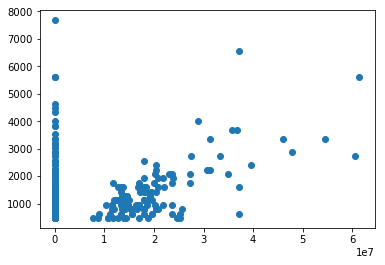

Pearson corrCoef for a 0.25176540464


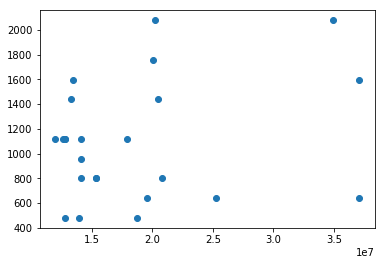

Pearson corrCoef for e nan


C:\Users\alexutza_a\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\alexutza_a\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\alexutza_a\Anaconda3\lib\site-packages\scipy\stats\stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\alexutza_a\Anaconda3\lib\site-packages\scipy\stats\stats.py:5084: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


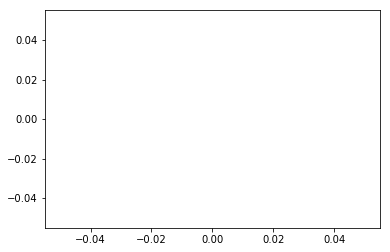

Pearson corrCoef for E 0.611118361612


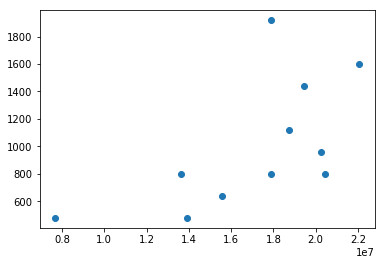

Pearson corrCoef for i 1.0


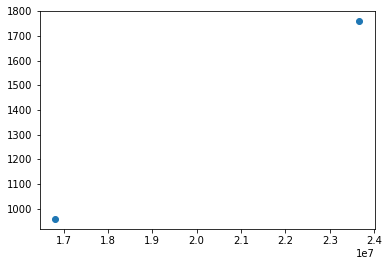

Pearson corrCoef for o 0.984770994449


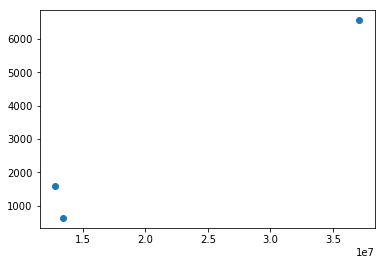

Pearson corrCoef for u nan


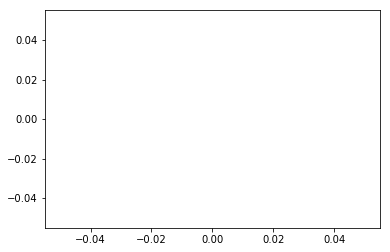

Pearson corrCoef for y nan


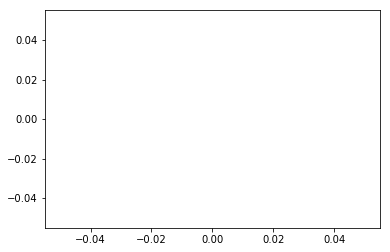

Pearson corrCoef for 2 nan


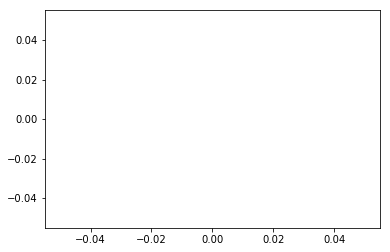

In [9]:
# Plot phoneme duration vs. speech rate as word_dur / no. of phones; Training data.
print("Pearson corrCoef for all vowels: " + str(performance_measures.corrCoef(predictions, actual)[0]))
plt.scatter(predictions, actual)
plt.show()

#plt.scatter(p_dict["S"], a_dict["S"])
#plt.show()

#plt.scatter(p_dict["C"], a_dict["C"])
#plt.show()

for el in ["a", "e", "E", "i", "o", "u", "y", "2"]:
    print("Pearson corrCoef for " + el + " " + str(performance_measures.corrCoef(p_dict[el], a_dict[el])[0]))
    plt.scatter(p_dict[el], a_dict[el])
    plt.show()

In [10]:
# Create plots for showing correlations between phoneme duration and different types of SR calculation, using all data
import phon_dict
phoneme_list = ["a", "a~", "e", "E", "I", "i", "O", "o", "U", "u", "Y", "y", "9", "2", "a:", "a~:", "e:", "E:", "i:", "o:", "u:", "y:", "2:", "OY", "aU", "aI"]
big_dict = phon_dict.phon_dict(phoneme_list)

['a:', 'g001acn1_000_AAJ.par', 'Start_word', 'ITJ', 'near_pause', 'p_stress', '0', 13.9, 1.8, 6.2, 0.004, 'one_s', 0.05, 'a:', 'g001acn1_000_AAJ.par', 'Middle_word', 'NN', 'no_pause', 'p_stress', '0', 13.9, 0.9, 6.2, 0.0063, 'one_s', 0.13, 'a:', 'g001acn1_000_AAJ.par', 'Middle_word', 'ADV', 'no_pause', 'p_stress', '0', 13.9, 1.3, 6.2, 0.0055, 'one_s', 0.06, 'a:', 'g001acn1_000_AAJ.par', 'Middle_word', 'VVFIN', 'no_pause', 'none', '0', 13.9, 0.9, 6.2, 0.0085, 'w_initial', 0.05, 'a:', 'g001acn1_000_AAJ.par', 'Middle_word', 'NN', 'no_pause', 'p_stress', '0', 13.9, 0.7, 6.2, 0.0077, 'w_initial', 0.08]
k 


In [11]:
# Lists from all DB for: vowel durations, 4 different speech rate lists
overall_duration_list, new_SR_list, msyl_list, LSR_list, PSR_list = [], [], [], [], []
for el in phoneme_list:
    overall_duration_list += big_dict[el][12::13]
    new_SR_list += big_dict[el][10::13]
    msyl_list += big_dict[el][9::13]
    LSR_list += big_dict[el][8::13]
    PSR_list += big_dict[el][7::13]
#print(len(overall_duration_list))
#print(len(new_SR_list))
#print(len(msyl_list))
#print(len(LSR_list))
#print(len(PSR_list))

Pho duration vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.71594296278167147, 0.0)


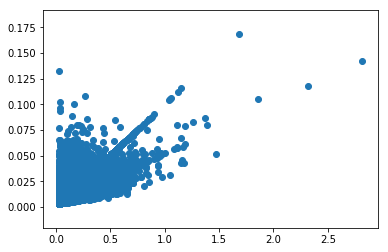

Pho duration vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.14395318377589489, 0.0)


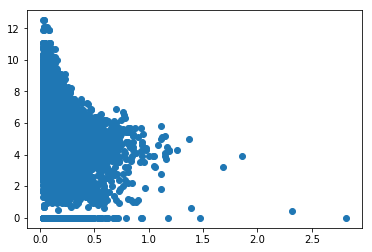

Pho duration vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.5109626071492992, 0.0)


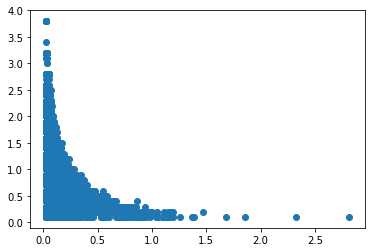

Pho duration vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.16263051570605702, 0.0)


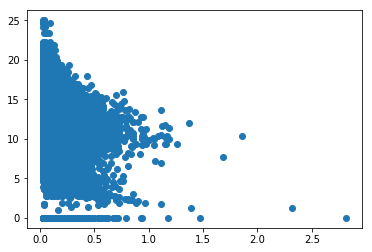

In [12]:
# Scatter plot + corrCoef for: vowel durations vs. speech rate (4 diff. calculation formulae)
print("Pho duration vs. SR (word_dur / no of phones) \nPearson CorrCoef: " + str(performance_measures.corrCoef(overall_duration_list, new_SR_list)))
plt.scatter(overall_duration_list, new_SR_list)
plt.show()

print("Pho duration vs. SR (MAU-Syllables / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(overall_duration_list, msyl_list)))
plt.scatter(overall_duration_list, msyl_list)
plt.show()

print("Pho duration vs. local speech rate (LSR) \nPearson CorrCoef: " + str(performance_measures.corrCoef(overall_duration_list, LSR_list)))
plt.scatter(overall_duration_list, LSR_list)
plt.show()

print("Pho duration vs. SR (no of phonemes / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(overall_duration_list, PSR_list)))
plt.scatter(overall_duration_list, PSR_list)
plt.show()

Duration of a vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.4925930976424796, 0.0)


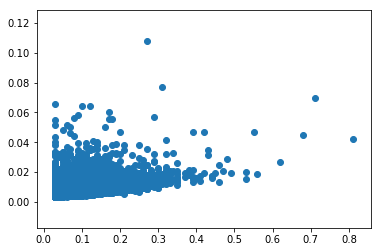

Duration of a vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.13447595574816396, 1.1620844069163611e-109)


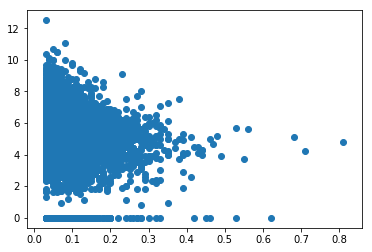

Duration of a vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.49771942547643921, 0.0)


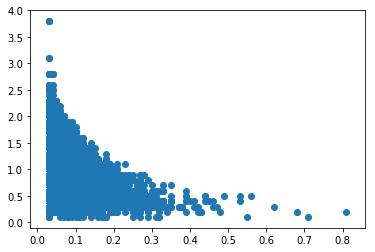

Duration of a vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.13915525488482586, 2.3163933149196205e-117)


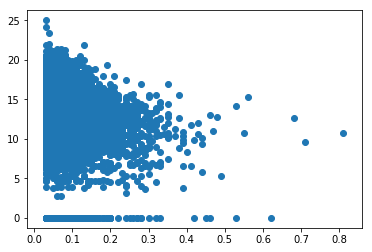

Duration of E vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.40614765082273885, 0.0)


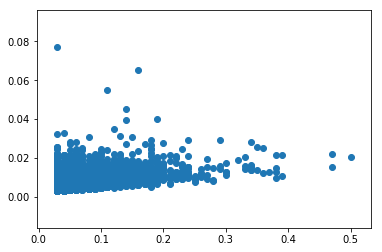

Duration of E vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.1226737478251836, 1.7302203431427523e-45)


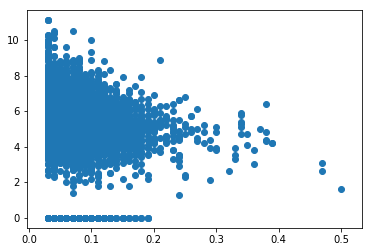

Duration of E vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.42952862621206295, 0.0)


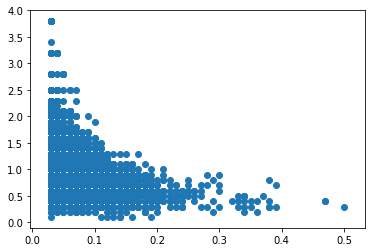

Duration of E vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.10754556351740432, 2.6525852589905977e-35)


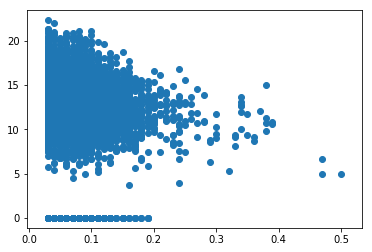

Duration of 9 vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.38482521625411958, 1.7100725844211651e-60)


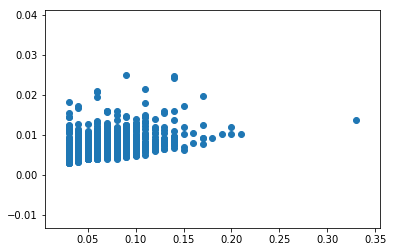

Duration of 9 vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.18192247481275889, 5.5487267658799942e-14)


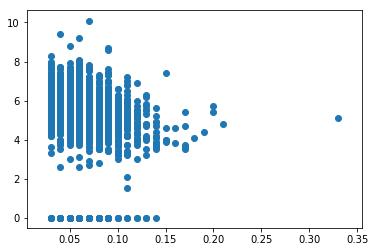

Duration of 9 vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.46493371413401907, 5.8934545751520733e-91)


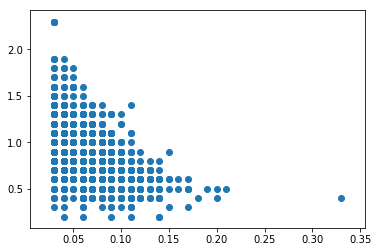

Duration of 9 vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.15658637805985468, 1.0676646402541146e-10)


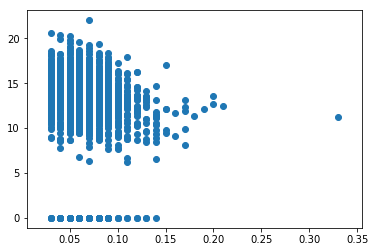

Duration of O vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.4938321007864323, 0.0)


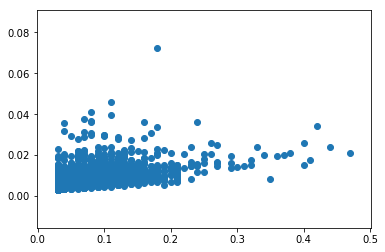

Duration of O vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.14815181325793317, 2.7135694729784811e-38)


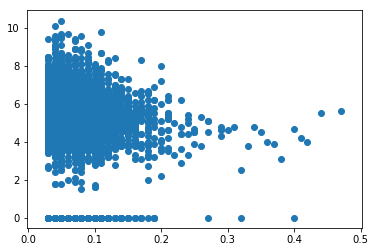

Duration of O vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.47528862955290785, 0.0)


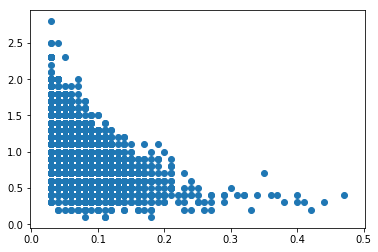

Duration of O vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.16342098080060455, 2.5327040107913441e-46)


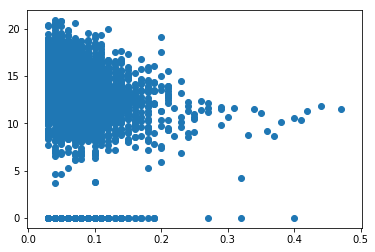

In [13]:
# Prepare data for Scatter plot & corrCoef for each vowel in whole DB.
# Save phoneme correlation data to a file
corr_file = open("C:/Users/alexutza_a/Abschlussarbeit/phoneme0_SR_correlations.txt", "w")
corr_file.write("Phoneme	corr_w_dur_per_pno	corr_msyl_per_turn	corr_LSR	corr_pno_per_turn\n")

phon_duration_list, new_SR_list1, msyl_list1, LSR_list1, PSR_list1 = [], [], [], [], []
for el in ["a", "E", "9", "O"]:
    phon_duration_list = big_dict[el][12::13]
    new_SR_list1 = big_dict[el][10::13]
    msyl_list1 = big_dict[el][9::13]
    LSR_list1 = big_dict[el][8::13]
    PSR_list1 = big_dict[el][7::13]
    print("Duration of " + el +" vs. SR (word_dur / no of phones) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, new_SR_list1)))
    plt.scatter(phon_duration_list, new_SR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (MAU-Syllables / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, msyl_list1)))
    plt.scatter(phon_duration_list, msyl_list1)
    plt.show()

    print("Duration of " + el +" vs. local speech rate (LSR) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, LSR_list1)))
    plt.scatter(phon_duration_list, LSR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (no of phonemes / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, PSR_list1)))
    plt.scatter(phon_duration_list, PSR_list1)
    plt.show()
    
    corr_file.write(el + "	" + str(round(performance_measures.corrCoef(phon_duration_list, new_SR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, msyl_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, LSR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, PSR_list1)[0], 5)) + "\n")
corr_file.close()

Duration of i vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.68337963277995795, 9.6333174759135192e-250)


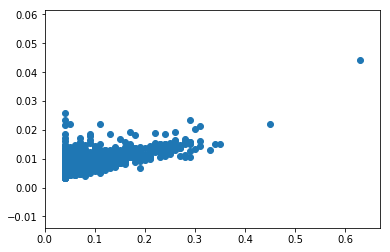

Duration of i vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.077380880418321848, 0.00097549910992079968)


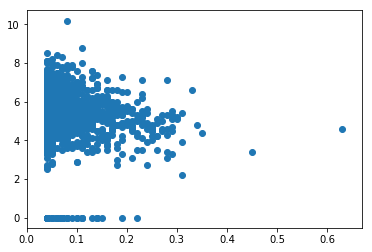

Duration of i vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.46709315786878092, 6.4990784026902058e-99)


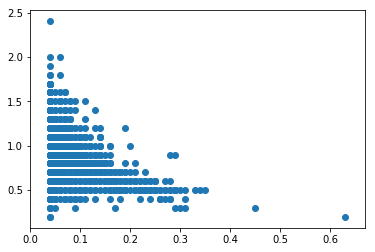

Duration of i vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.12508952403202292, 9.1140643883411858e-08)


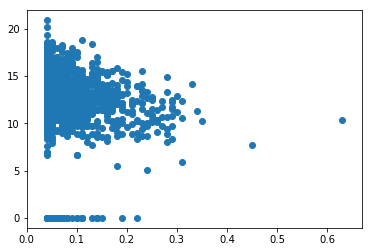

Duration of I vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.4742269964966489, 0.0)


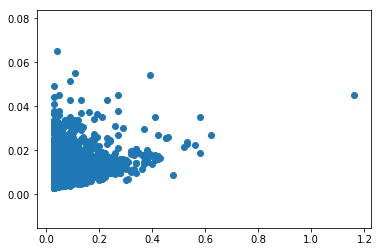

Duration of I vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.10598141288757806, 3.2529593540803036e-61)


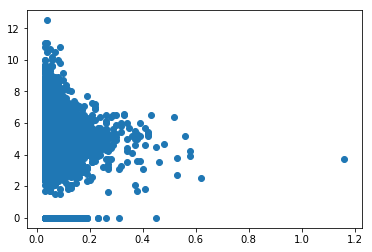

Duration of I vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.38167285247492849, 0.0)


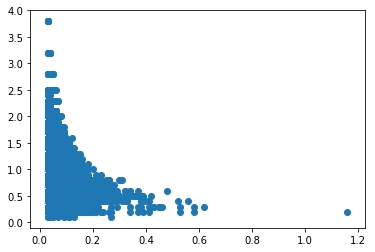

Duration of I vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.1084282048804411, 5.2759640027645485e-64)


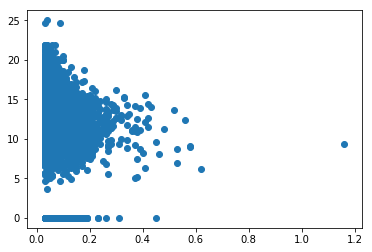

Duration of y vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.82276119477680532, 3.7566997389683798e-55)


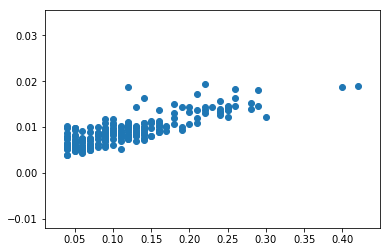

Duration of y vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.15813575725057408, 0.019203562778400692)


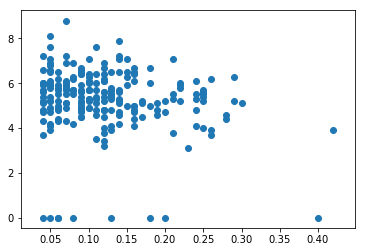

Duration of y vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.72614265376826692, 3.6698207039355526e-37)


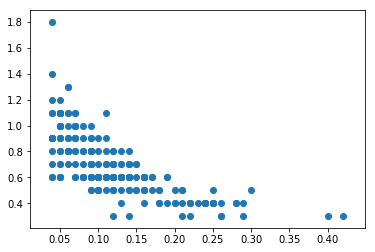

Duration of y vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.17206719746777432, 0.01074625987712413)


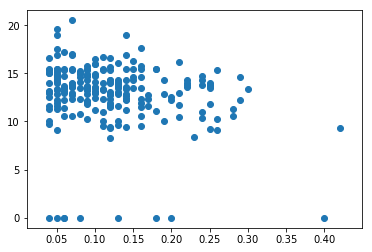

Duration of Y vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.33701555014389728, 6.7327221882038912e-116)


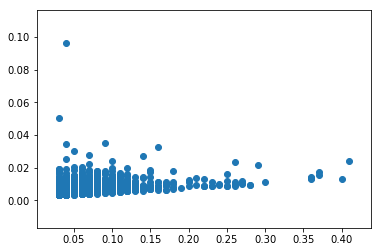

Duration of Y vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.16111758065133702, 1.1535520552672283e-26)


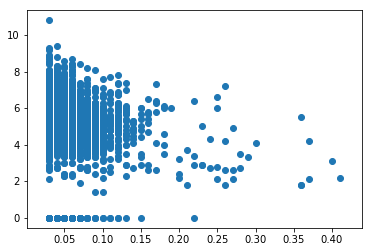

Duration of Y vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.35450307727617586, 7.0625212996440979e-129)


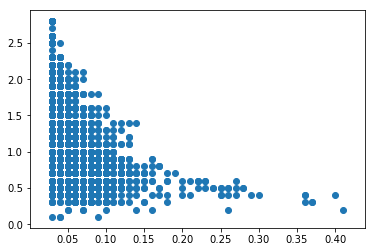

Duration of Y vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.11227710910495996, 1.1438387752400066e-13)


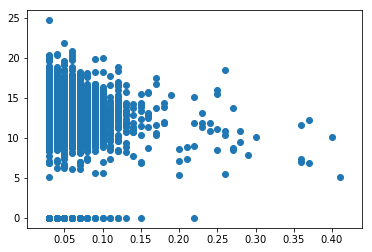

Duration of U vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.55281826095041364, 0.0)


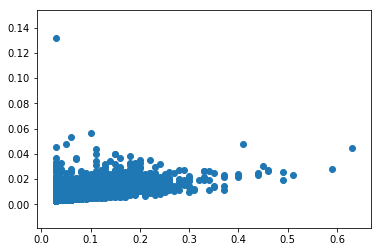

Duration of U vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.10029171043479845, 8.8457393100574716e-22)


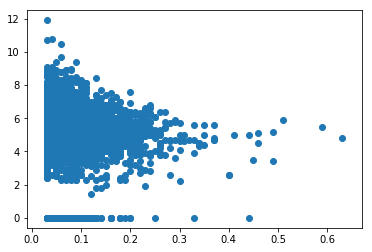

Duration of U vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.48777015742448215, 0.0)


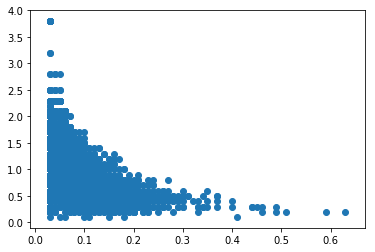

Duration of U vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.11874014070991348, 6.2367783625709515e-30)


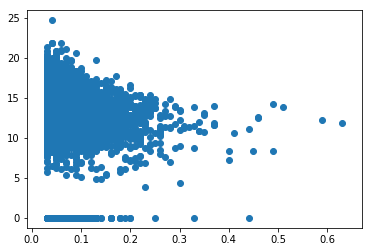

Duration of u vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.4566038875302873, 6.1019423916707596e-52)


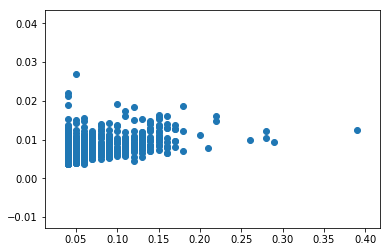

Duration of u vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.11100765999344689, 0.00047926127766039986)


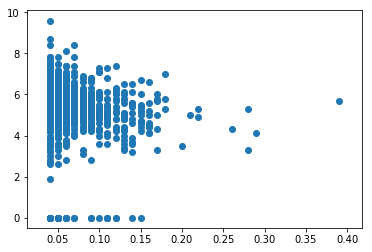

Duration of u vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.40077589117274875, 2.4404129071539057e-39)


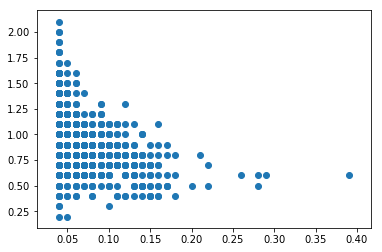

Duration of u vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.12802623183246592, 5.5396746057971298e-05)


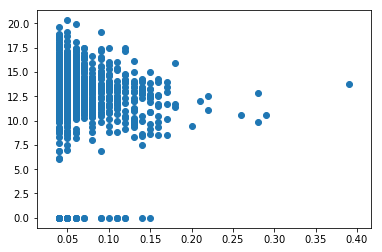

In [14]:
# Prepare data for Scatter plot & corrCoef for each vowel in whole DB.
# Save phoneme correlation data to a file
corr1_file = open("C:/Users/alexutza_a/Abschlussarbeit/phoneme1_SR_correlations.txt", "w")
corr1_file.write("Phoneme	corr_w_dur_per_pno	corr_msyl_per_turn	corr_LSR	corr_pno_per_turn\n")

phon_duration_list, new_SR_list1, msyl_list1, LSR_list1, PSR_list1 = [], [], [], [], []
for el in ["i", "I", "y", "Y", "U", "u"]:
    phon_duration_list = big_dict[el][12::13]
    new_SR_list1 = big_dict[el][10::13]
    msyl_list1 = big_dict[el][9::13]
    LSR_list1 = big_dict[el][8::13]
    PSR_list1 = big_dict[el][7::13]
    print("Duration of " + el +" vs. SR (word_dur / no of phones) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, new_SR_list1)))
    plt.scatter(phon_duration_list, new_SR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (MAU-Syllables / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, msyl_list1)))
    plt.scatter(phon_duration_list, msyl_list1)
    plt.show()

    print("Duration of " + el +" vs. local speech rate (LSR) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, LSR_list1)))
    plt.scatter(phon_duration_list, LSR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (no of phonemes / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, PSR_list1)))
    plt.scatter(phon_duration_list, PSR_list1)
    plt.show()
    
    corr1_file.write(el + "	" + str(round(performance_measures.corrCoef(phon_duration_list, new_SR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, msyl_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, LSR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, PSR_list1)[0], 5)) + "\n")
corr1_file.close()

Duration of e vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.36342361678424945, 3.096147765658798e-33)


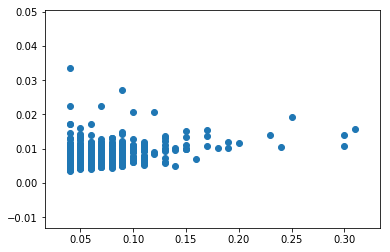

Duration of e vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.11142237181811597, 0.00036103600327282474)


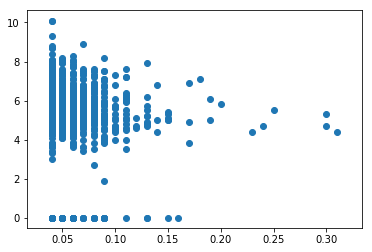

Duration of e vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.31726809625719543, 2.6125603150336433e-25)


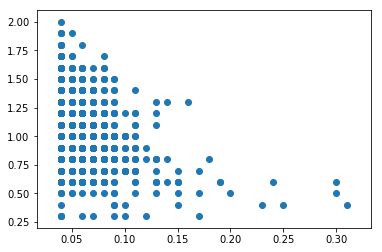

Duration of e vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.12172380867433318, 9.6513114745097961e-05)


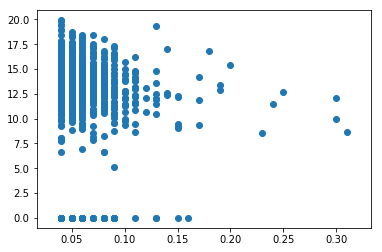

Duration of 2 vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (nan, nan)


C:\Users\alexutza_a\Anaconda3\lib\site-packages\scipy\stats\stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\alexutza_a\Anaconda3\lib\site-packages\scipy\stats\stats.py:5084: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


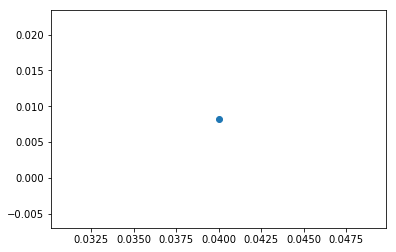

Duration of 2 vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (nan, nan)


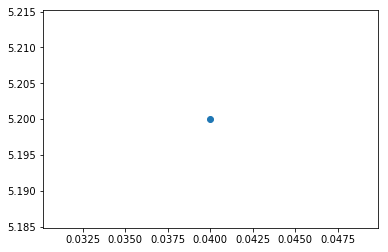

Duration of 2 vs. local speech rate (LSR) 
Pearson CorrCoef: (nan, nan)


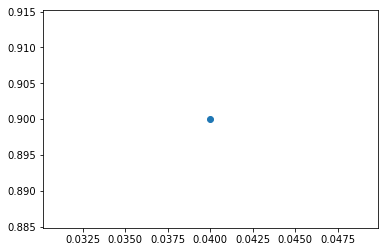

Duration of 2 vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (nan, nan)


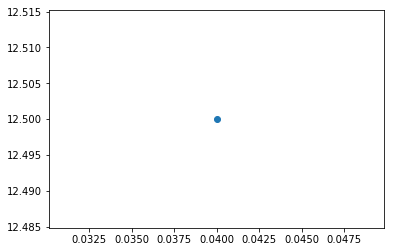

Duration of o vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.5849155334412709, 0.0)


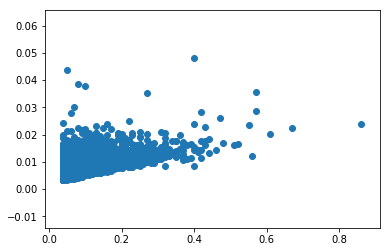

Duration of o vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.13076152013607731, 8.2237598665425662e-19)


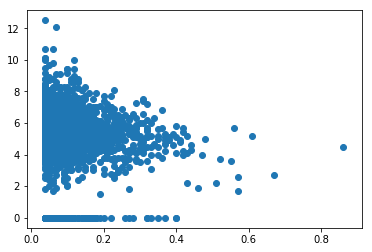

Duration of o vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.4276376812696977, 8.7673997836485321e-202)


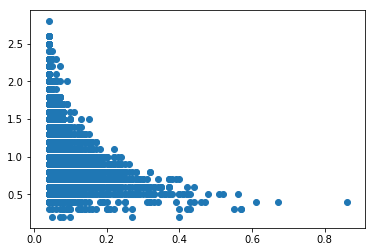

Duration of o vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.17903717169278777, 4.3177592250743479e-34)


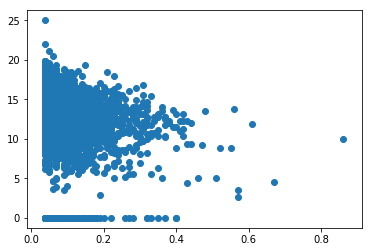

Duration of aI vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.69652222082721349, 0.0)


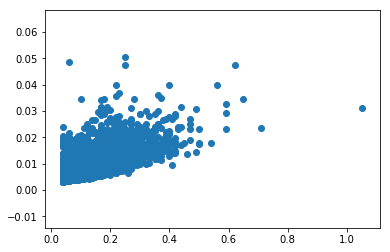

Duration of aI vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.13452756228199059, 5.0013739810607319e-49)


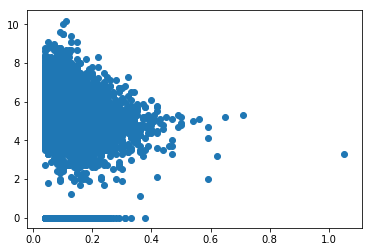

Duration of aI vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.66632520573115139, 0.0)


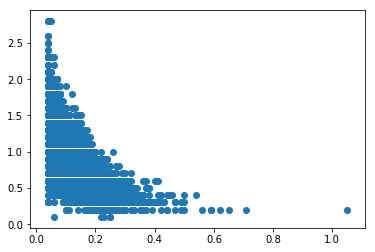

Duration of aI vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.13404821783517187, 1.0921131555067264e-48)


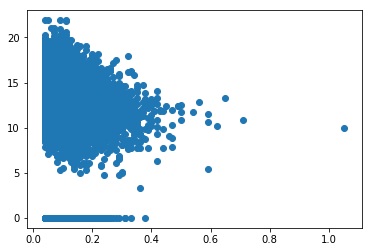

Duration of aU vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.65304878873077088, 0.0)


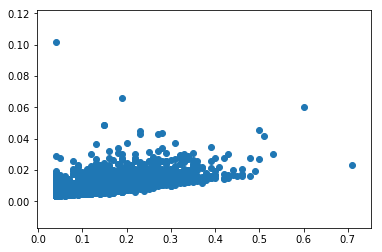

Duration of aU vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.19062276057912775, 8.825889824334686e-55)


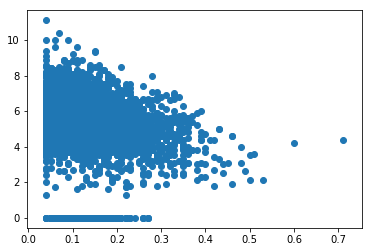

Duration of aU vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.64432549237169778, 0.0)


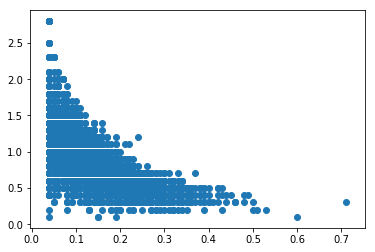

Duration of aU vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.21702376670895798, 7.5743617635293625e-71)


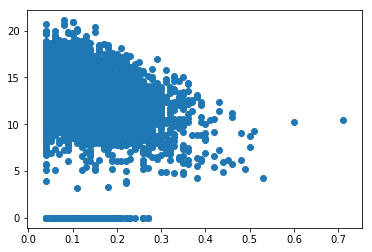

Duration of OY vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.54756605512573009, 5.6821276239055808e-85)


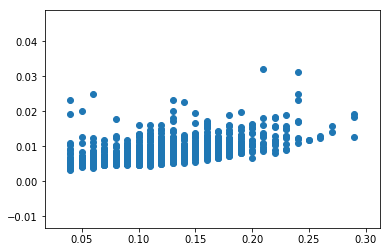

Duration of OY vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.10228338146066819, 0.00079261164609633987)


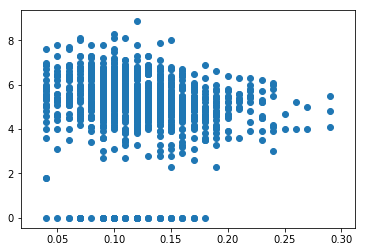

Duration of OY vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.60810630291975465, 1.6805113596656808e-109)


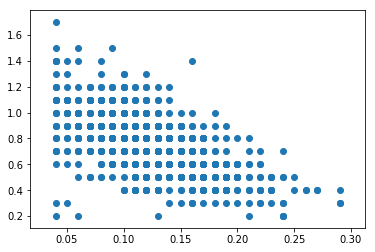

Duration of OY vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.11870793027449175, 9.7096811411007971e-05)


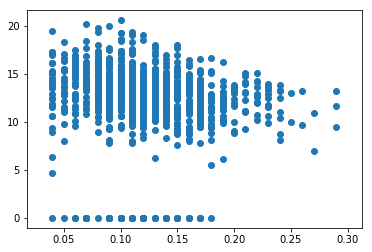

In [15]:
# Prepare data for Scatter plot & corrCoef for each vowel in whole DB.
# Save phoneme correlation data to a file
corr2_file = open("C:/Users/alexutza_a/Abschlussarbeit/phoneme2_SR_correlations.txt", "w")
corr2_file.write("Phoneme	corr_w_dur_per_pno	corr_msyl_per_turn	corr_LSR	corr_pno_per_turn\n")

phon_duration_list, new_SR_list1, msyl_list1, LSR_list1, PSR_list1 = [], [], [], [], []
for el in ["e", "2", "o", "aI", "aU", "OY"]:
    phon_duration_list = big_dict[el][12::13]
    new_SR_list1 = big_dict[el][10::13]
    msyl_list1 = big_dict[el][9::13]
    LSR_list1 = big_dict[el][8::13]
    PSR_list1 = big_dict[el][7::13]
    print("Duration of " + el +" vs. SR (word_dur / no of phones) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, new_SR_list1)))
    plt.scatter(phon_duration_list, new_SR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (MAU-Syllables / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, msyl_list1)))
    plt.scatter(phon_duration_list, msyl_list1)
    plt.show()

    print("Duration of " + el +" vs. local speech rate (LSR) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, LSR_list1)))
    plt.scatter(phon_duration_list, LSR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (no of phonemes / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, PSR_list1)))
    plt.scatter(phon_duration_list, PSR_list1)
    plt.show()
    
    corr2_file.write(el + "	" + str(round(performance_measures.corrCoef(phon_duration_list, new_SR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, msyl_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, LSR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, PSR_list1)[0], 5)) + "\n")
corr2_file.close()

Duration of a: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.74788730893121247, 0.0)


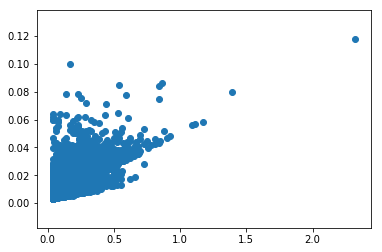

Duration of a: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.26600843533521351, 0.0)


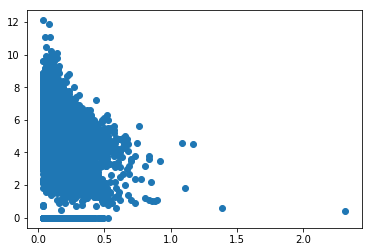

Duration of a: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.64290475544923065, 0.0)


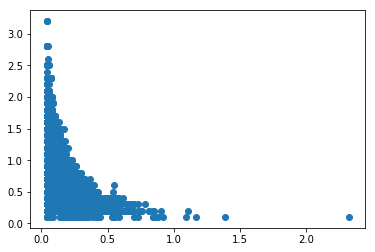

Duration of a: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.28763708307479119, 0.0)


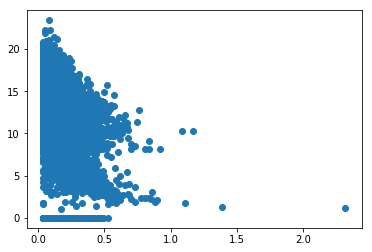

Duration of a~: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.6813231756791932, 1.1967561251232675e-18)


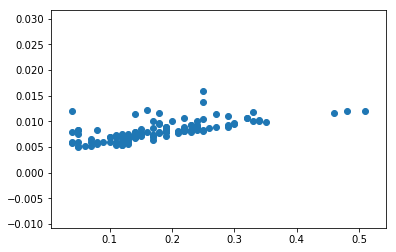

Duration of a~: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (0.015381989676922466, 0.86371864910237872)


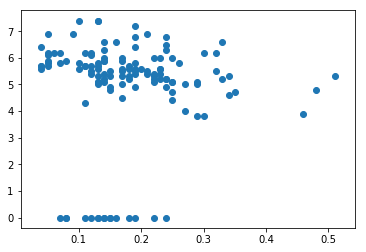

Duration of a~: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.70410814202088179, 2.6058556167498935e-20)


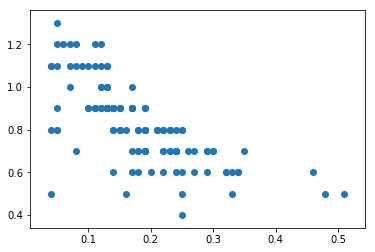

Duration of a~: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.021711053973560386, 0.80856278132596793)


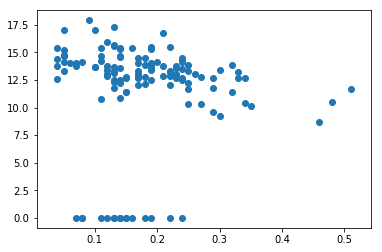

Duration of a~ vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.27048523690492982, 0.48147102192534647)


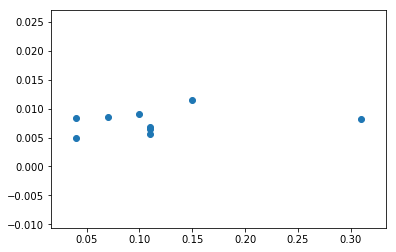

Duration of a~ vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (0.17381486691917528, 0.65470125899377274)


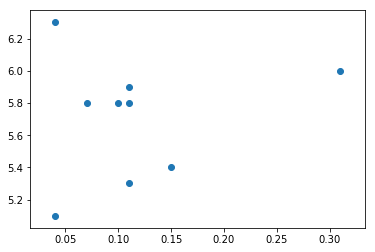

Duration of a~ vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.29297726563771737, 0.4442119756227299)


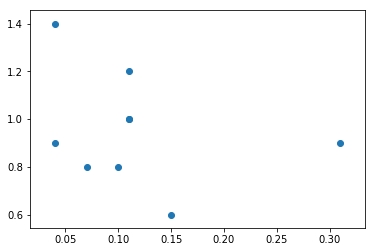

Duration of a~ vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.23788044140835213, 0.5376680216657842)


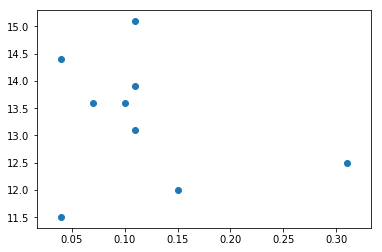

Duration of e: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.69794280989796953, 0.0)


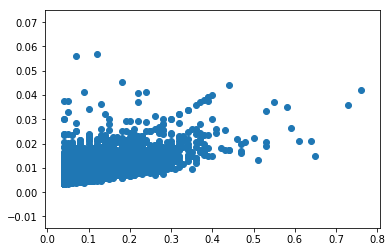

Duration of e: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.099976454327765987, 4.2166084037261009e-26)


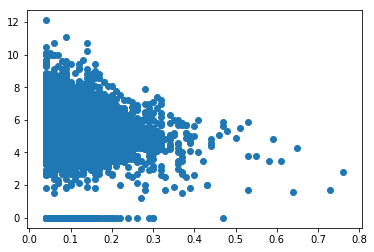

Duration of e: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.54343296514336437, 0.0)


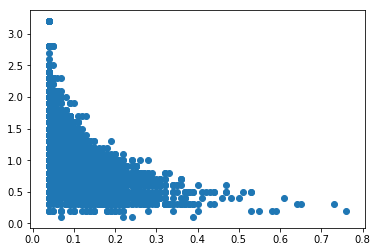

Duration of e: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.1666350904029486, 4.7502780442750639e-70)


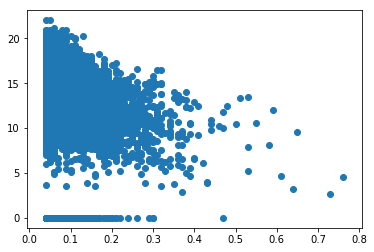

Duration of E: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.84593019267737235, 0.0)


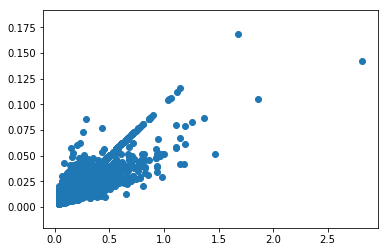

Duration of E: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.19897527566588188, 1.788503523298282e-47)


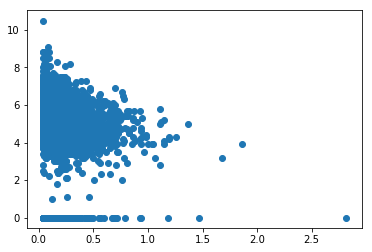

Duration of E: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.62145006077438003, 0.0)


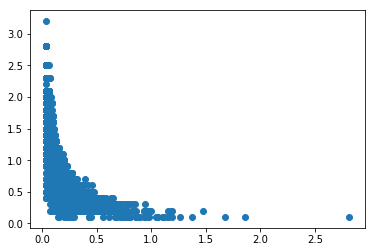

Duration of E: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.20012786736067026, 5.1345247678425673e-48)


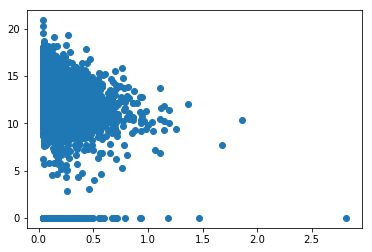

Duration of i: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.76017313014470556, 0.0)


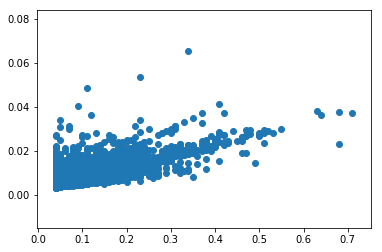

Duration of i: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.10824160405794069, 4.1203295250177502e-41)


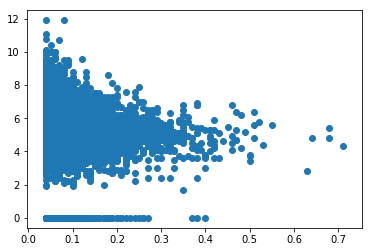

Duration of i: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.57858865818197847, 0.0)


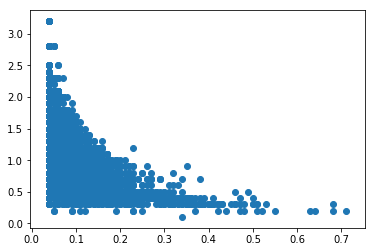

Duration of i: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.12107893827665527, 4.5165769164190909e-51)


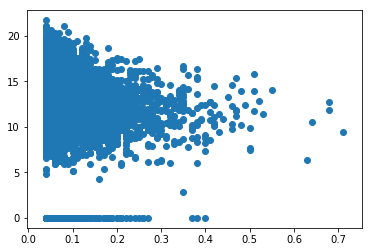

Duration of o: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.73637520592562267, 0.0)


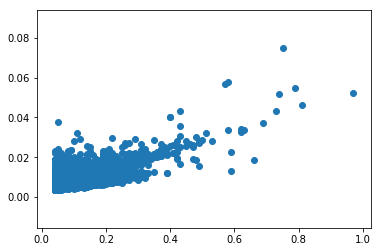

Duration of o: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.14218653403227713, 9.8243750140718492e-34)


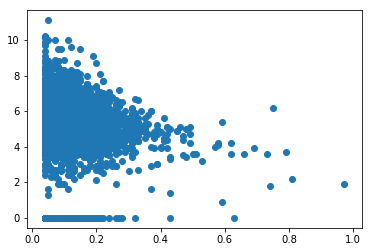

Duration of o: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.55437168010887317, 0.0)


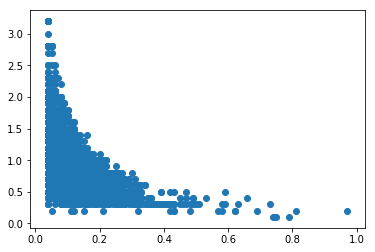

Duration of o: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.15966326962741059, 3.3881852102631977e-42)


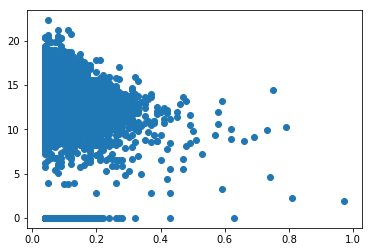

Duration of u: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.57979415919115562, 0.0)


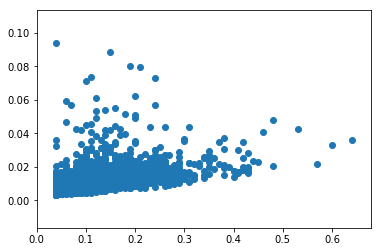

Duration of u: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.18322261515322324, 5.6317742433881715e-54)


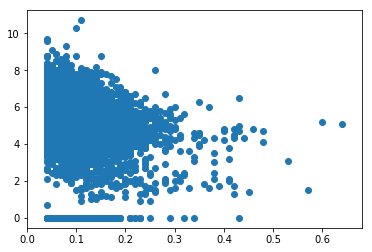

Duration of u: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.58174030945551525, 0.0)


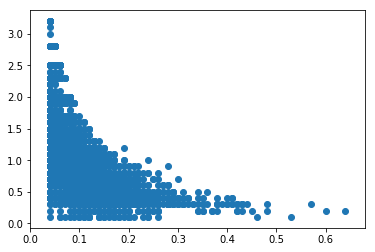

Duration of u: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.18584881530443048, 1.6501814919325422e-55)


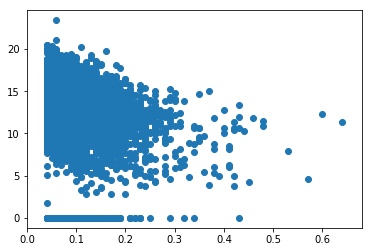

Duration of y: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.59372237574687525, 1.7611401695807733e-155)


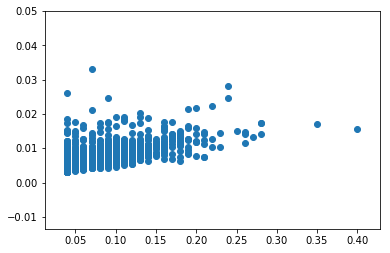

Duration of y: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.065848348808127677, 0.0079052639687552193)


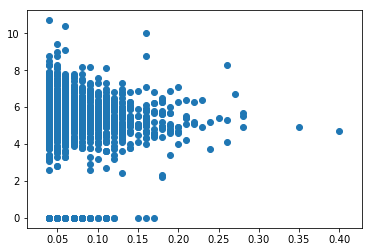

Duration of y: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.52806853948157872, 1.9358621311755018e-117)


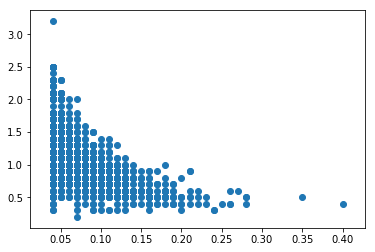

Duration of y: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.064524577991284943, 0.0092525082188079383)


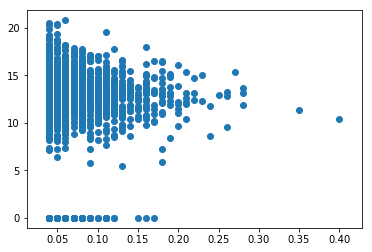

Duration of 2: vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.62825180162604644, 2.1708166531973599e-96)


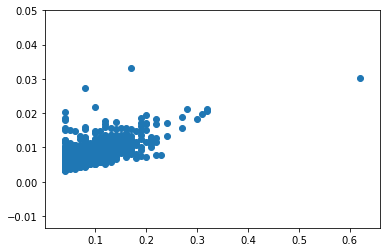

Duration of 2: vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.17048553531564598, 4.4251983290536948e-07)


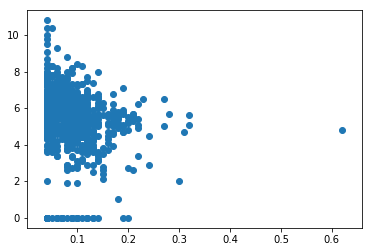

Duration of 2: vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.54257869234352551, 1.5902297832236794e-67)


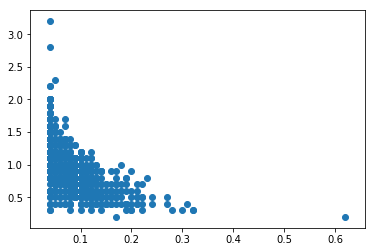

Duration of 2: vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.14707514765160817, 1.3736871215071313e-05)


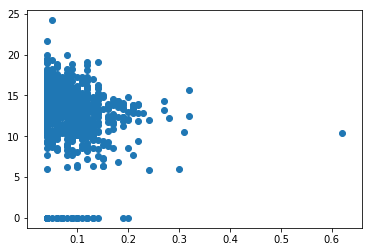

In [16]:
# Prepare data for Scatter plot & corrCoef for each vowel in whole DB.
# Save phoneme correlation data to a file
corr3_file = open("C:/Users/alexutza_a/Abschlussarbeit/phoneme3_SR_correlations.txt", "w")
corr3_file.write("Phoneme	corr_w_dur_per_pno	corr_msyl_per_turn	corr_LSR	corr_pno_per_turn\n")

phon_duration_list, new_SR_list1, msyl_list1, LSR_list1, PSR_list1 = [], [], [], [], []
for el in ["a:", "a~:", "a~", "e:", "E:", "i:", "o:", "u:", "y:", "2:"]:
    phon_duration_list = big_dict[el][12::13]
    new_SR_list1 = big_dict[el][10::13]
    msyl_list1 = big_dict[el][9::13]
    LSR_list1 = big_dict[el][8::13]
    PSR_list1 = big_dict[el][7::13]
    print("Duration of " + el +" vs. SR (word_dur / no of phones) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, new_SR_list1)))
    plt.scatter(phon_duration_list, new_SR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (MAU-Syllables / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, msyl_list1)))
    plt.scatter(phon_duration_list, msyl_list1)
    plt.show()

    print("Duration of " + el +" vs. local speech rate (LSR) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, LSR_list1)))
    plt.scatter(phon_duration_list, LSR_list1)
    plt.show()

    print("Duration of " + el +" vs. SR (no of phonemes / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(phon_duration_list, PSR_list1)))
    plt.scatter(phon_duration_list, PSR_list1)
    plt.show()
    
    corr3_file.write(el + "	" + str(round(performance_measures.corrCoef(phon_duration_list, new_SR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, msyl_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, LSR_list1)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(phon_duration_list, PSR_list1)[0], 5)) + "\n")
corr3_file.close()

In [17]:
# Create plots for showing correlations between consonant duration and different types of SR calculation, using all data
# This dict doesn't use the syllable count function!
import phon_dict
consonant_list = ["z", "S", "Z", "C", "x", "N", "Q", "b", "d", "f", "g", "h", "j", "k", "l", "m", "n", "p", "r", "s", "t", "v"]
big_cons_dict = phon_dict.phon_dict(consonant_list)

k 
m 
m 
m 
m 
m 
m 
m 
m 
m 
k 
k 
Qm 
m 
m 
Qm 
m 
m 
Qm 
m 
m 
Qm 
m 
m 
Qm 
m 
m 
Qm 
m 
m 
Qm 
m 
m 
Qm 
m 
m 
Qm 
m 
m 


Duration of f vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.5763173351677322, 0.0)


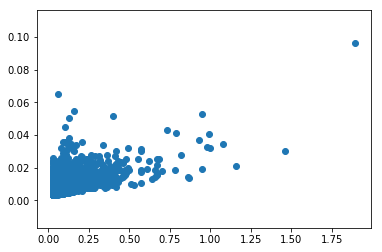

Duration of f vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.079956955768732921, 1.8088583214160465e-25)


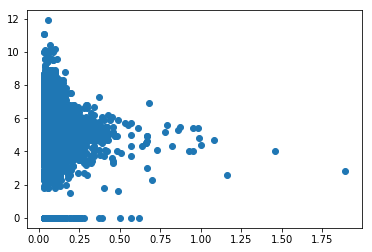

Duration of f vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.39515602635140262, 0.0)


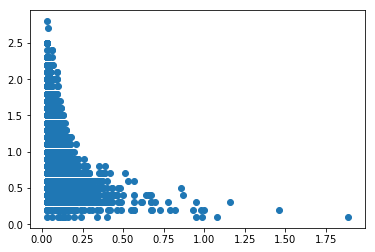

Duration of f vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.088675760223724101, 5.7398401928047701e-31)


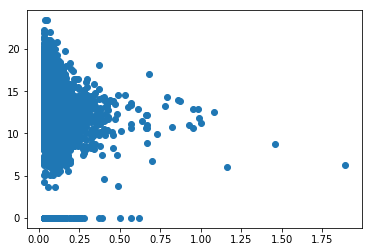

Duration of v vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.4768001556224693, 0.0)


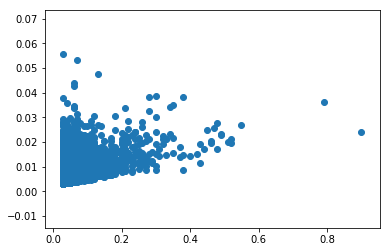

Duration of v vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.085408196914896164, 6.2454463312493408e-31)


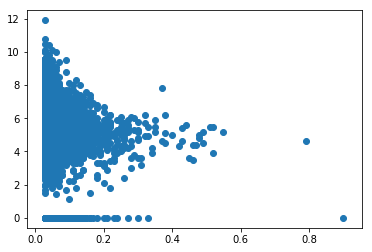

Duration of v vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.38347190752728116, 0.0)


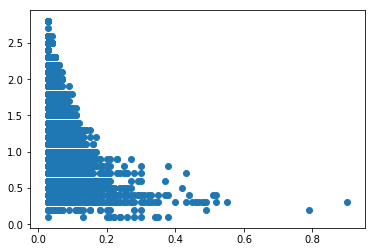

Duration of v vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.093489201042567777, 9.4631726547475802e-37)


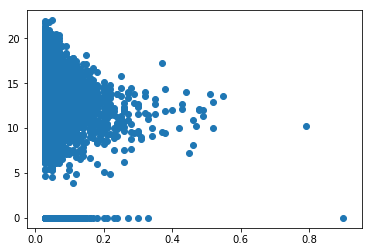

Duration of s vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.5392421153610153, 0.0)


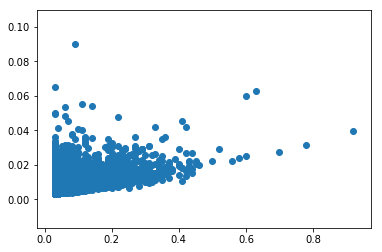

Duration of s vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.082283750408499334, 1.056319748377939e-51)


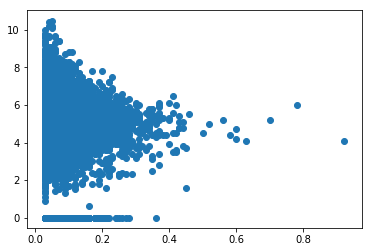

Duration of s vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.41670807450255498, 0.0)


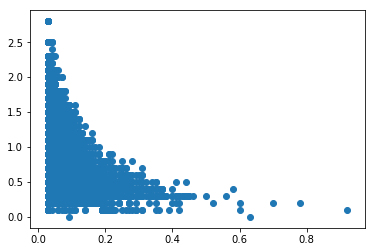

Duration of s vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.093270412368709657, 5.6293395275976641e-66)


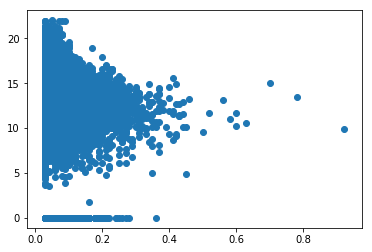

Duration of S vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.42275989862009916, 3.5580056847577372e-259)


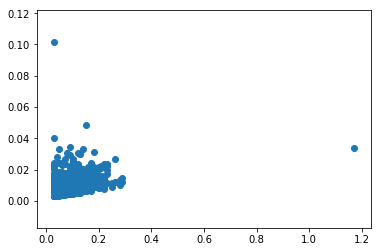

Duration of S vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.069345327378863189, 7.4133821134474745e-08)


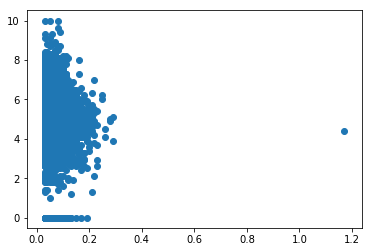

Duration of S vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.41627803225586912, 1.4698624117532739e-250)


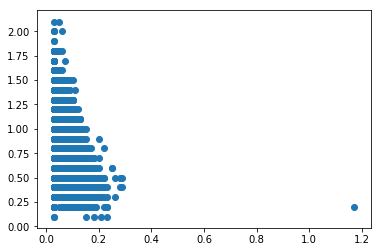

Duration of S vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.08116283263905294, 2.9640607932836168e-10)


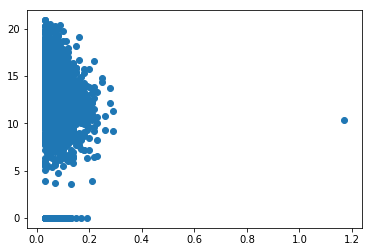

Duration of x vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.73177071647439418, 0.0)


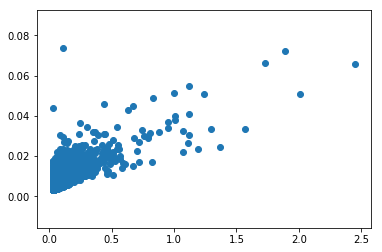

Duration of x vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.10880072731555143, 1.2796886360599851e-20)


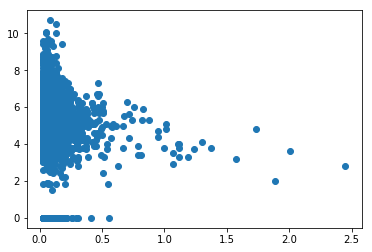

Duration of x vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.46567556161610885, 0.0)


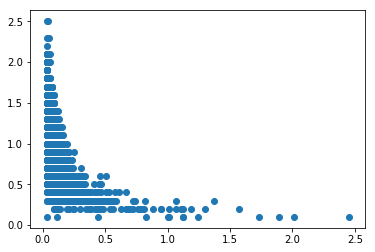

Duration of x vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.12256277026289165, 9.018843505358401e-26)


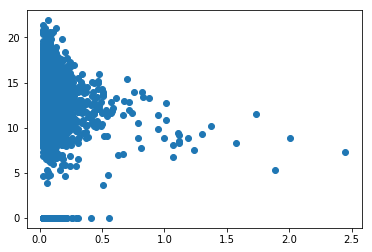

Duration of C vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.60245523479076624, 0.0)


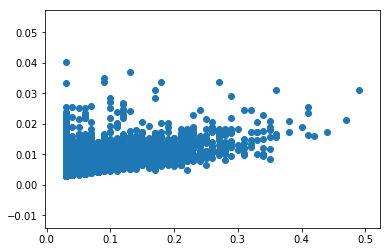

Duration of C vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.070092371547435792, 2.7867206513686468e-16)


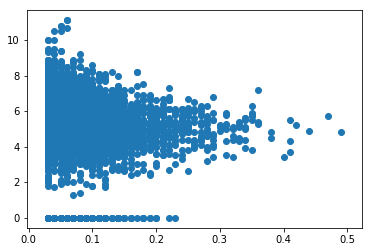

Duration of C vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.44607597359118772, 0.0)


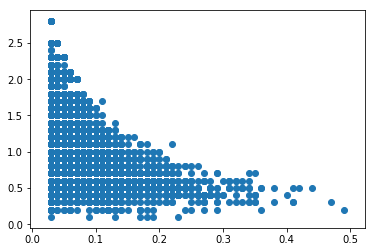

Duration of C vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.082231804891989252, 7.7072916768039073e-22)


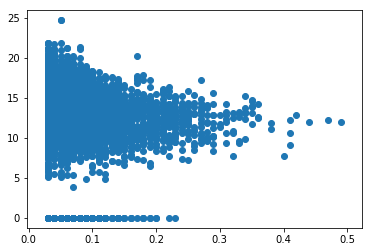

Duration of h vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.60523718816038219, 0.0)


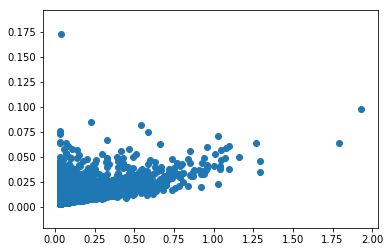

Duration of h vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (-0.19715340338411155, 5.1162576126610109e-87)


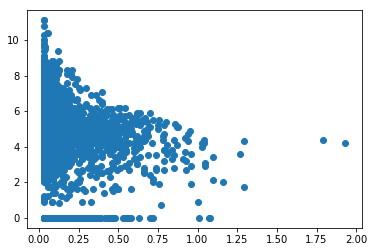

Duration of h vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.40121058210260246, 0.0)


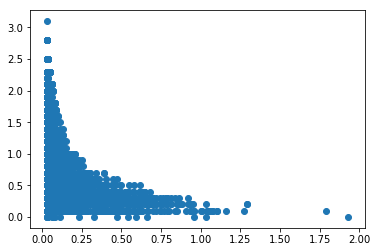

Duration of h vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (-0.20327010567432061, 1.7042537765702337e-92)


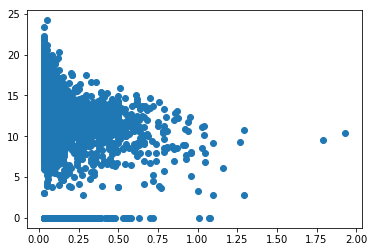

Duration of Z vs. SR (word_dur / no of phones) 
Pearson CorrCoef: (0.17132668212489088, 0.060251447609230735)


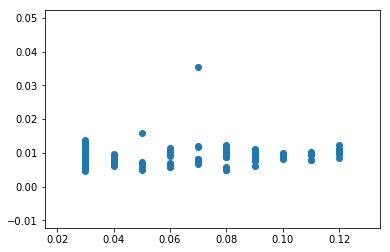

Duration of Z vs. SR (MAU-Syllables / turn duration) 
Pearson CorrCoef: (0.15172927051497156, 0.096647019846707566)


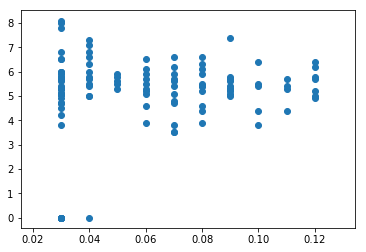

Duration of Z vs. local speech rate (LSR) 
Pearson CorrCoef: (-0.24249870882393246, 0.0073639386705768905)


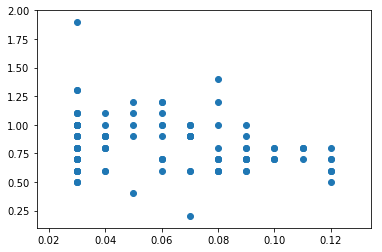

Duration of Z vs. SR (no of phonemes / turn duration) 
Pearson CorrCoef: (0.17363181168957478, 0.056829737459228397)


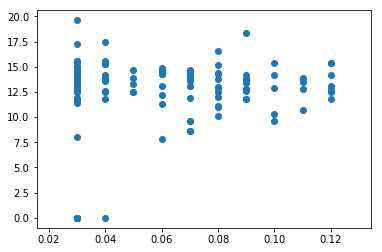

In [18]:
# Prepare data for Scatter plot & corrCoef for each fricative consonant in whole DB.
# Save phoneme correlation data to a file
corr4_file = open("C:/Users/alexutza_a/Abschlussarbeit/fric_SR_correlations.txt", "w")
corr4_file.write("Phoneme	corr_w_dur_per_pno	corr_msyl_per_turn	corr_LSR	corr_pno_per_turn\n")
cons_duration_list, new_SR_list2, msyl_list2, LSR_list2, PSR_list2 = [], [], [], [], []
for el in ["f", "v", "s", "S", "x", "C", "h", "Z"]:
    cons_duration_list = big_cons_dict[el][12::13]
    new_SR_list2 = big_cons_dict[el][10::13]
    msyl_list2 = big_cons_dict[el][9::13]
    LSR_list2 = big_cons_dict[el][8::13]
    PSR_list2 = big_cons_dict[el][7::13]
    print("Duration of " + el +" vs. SR (word_dur / no of phones) \nPearson CorrCoef: " + str(performance_measures.corrCoef(cons_duration_list, new_SR_list2)))
    plt.scatter(cons_duration_list, new_SR_list2)
    plt.show()

    print("Duration of " + el +" vs. SR (MAU-Syllables / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(cons_duration_list, msyl_list2)))
    plt.scatter(cons_duration_list, msyl_list2)
    plt.show()

    print("Duration of " + el +" vs. local speech rate (LSR) \nPearson CorrCoef: " + str(performance_measures.corrCoef(cons_duration_list, LSR_list2)))
    plt.scatter(cons_duration_list, LSR_list2)
    plt.show()

    print("Duration of " + el +" vs. SR (no of phonemes / turn duration) \nPearson CorrCoef: " + str(performance_measures.corrCoef(cons_duration_list, PSR_list2)))
    plt.scatter(cons_duration_list, PSR_list2)
    plt.show()
    
    corr4_file.write(el + "	" + str(round(performance_measures.corrCoef(cons_duration_list, new_SR_list2)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(cons_duration_list, msyl_list2)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(cons_duration_list, LSR_list2)[0], 5)) + "	" +
                   str(round(performance_measures.corrCoef(cons_duration_list, PSR_list2)[0], 5)) + "\n")
corr4_file.close()

In [21]:
cons_dict = open("C:/Users/alexutza_a/Abschlussarbeit/cons_dict.txt", "w")
cons_dict.write(str(big_cons_dict))
cons_dict.close()

In [22]:
vow_dict = open("C:/Users/alexutza_a/Abschlussarbeit/vowel_dict.txt", "w")
vow_dict.write(str(big_dict))
vow_dict.close()

In [39]:
f = open("C:/Users/alexutza_a/Abschlussarbeit/vowel_dict_d.txt")
d = f.readlines()
f.close()

{


In [42]:
# Returns the speaker with most turns in which a: occurs
from collections import Counter

speaker_la_list = [ x[-7:-4] for x in big_dict["a:"][1::13]]
speaker_set = set(speaker_la_list)
speaker_counter = Counter(speaker_la_list)
sort_sp_counter = speaker_counter.most_common()
print(speaker_counter.most_common(7))

[('AKX', 405), ('ALR', 380), ('AMO', 366), ('AJZ', 337), ('AMN', 335), ('AKM', 327), ('AMU', 319)]
